# Exercise 08.1

The hamiltonian of the system is
$$ \hat{H}\left(x,p\right) = \frac{\hat{p}^2}{2m} + \hat{x}^4 - \frac{5}{2} \hat{x}^2 $$
Where
$$ \langle x | \Psi \rangle = \Psi (x) $$
$$ \langle x | \hat{x}| \Psi \rangle = x \Psi(x) $$
$$ \langle x | \hat{p}| \Psi \rangle = -i\hbar\frac{\partial}{\partial x} \Psi(x) $$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on two variational parameters, $\sigma$, which is the width of the two Gaussians under square root, and $\mu$, which represents the distance from the origin of their average values.


Write a C++ Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample a trial wave function $|\Psi_T(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$ (Suggestion: as a starting point, you can use the code you have already developed for the Hydrogen atom or the Monte Carlo NVT code). Using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity.

First of all, I want to normalize the wave function such that
$$
\int dx | \Psi_T(x) |^2 = 1
$$
$$
1 = N^2 \int dx \left[ e^{-\frac{(x-\mu)^2}{\sigma^2}} + e^{-\frac{(x+\mu)^2}{\sigma^2}} + 
2 e^{-\frac{x^2+\mu^2}{\sigma^2}} \right] = \ldots
$$
$$
\int dx e^{-\frac{(x \pm \mu)^2}{\sigma^2}} = \sigma \sqrt{\pi}
$$
$$
\int dx e^{-\frac{x^2+\mu^2}{\sigma^2}} = \sigma \sqrt{\pi} e^{-\frac{\mu^2}{\sigma^2}}
$$
$$
1 = \ldots = N^2 \left[ \sigma \sqrt{\pi} + \sigma \sqrt{\pi} + \sigma \sqrt{\pi} e^{-\frac{\mu^2}{\sigma^2}} \right] = 2 \sigma \sqrt{\pi} \left( 1 + e^{-\frac{\mu^2}{\sigma^2}} \right) N^2
$$
$$
N = \frac{1}{\sqrt{2 \sigma \sqrt{\pi} \left( 1 + e^{-\frac{\mu^2}{\sigma^2}} \right)}}
$$

$$
\Psi_T^{\sigma,\mu}(x) = \frac{e^{-\frac{(x-\mu)^2}{2\sigma^2}} + e^{-\frac{(x+\mu)^2}{2\sigma^2}}}{\sqrt{2 \sigma \sqrt{\pi} \left( 1 + e^{-\frac{\mu^2}{\sigma^2}} \right)}}
$$

$$
\langle x | \hat{H} | \Psi_T \rangle = N \left[
- \frac{\hbar^2}{2m} \frac{\partial}{\partial x} \left( -\frac{(x-\mu)}{\sigma^2} e^{-\frac{(x-\mu)^2}{2\sigma^2}} 
-\frac{(x+\mu)}{\sigma^2} e^{-\frac{(x+\mu)^2}{2\sigma^2}} \right)
\right] + V(x) \Psi_T(x)
$$

$$
\langle x | \hat{H} | \Psi_T \rangle = N \left[
- \frac{\hbar^2}{2m \sigma^2} \left( 
- e^{-\frac{(x-\mu)^2}{2\sigma^2}}
+ \frac{(x-\mu)^2}{\sigma^2} e^{-\frac{(x-\mu)^2}{2\sigma^2}} 
- e^{-\frac{(x+\mu)^2}{2\sigma^2}}
+ \frac{(x+\mu)^2}{\sigma^2} e^{-\frac{(x+\mu)^2}{2\sigma^2}} 
\right) 
\right] + V(x) \Psi_T(x)
$$

$$
\langle x | \hat{H} | \Psi_T \rangle = N \left[
- \frac{\hbar^2}{2m \sigma^4} \left( 
- \sigma^2 e^{-\frac{(x-\mu)^2}{2\sigma^2}}
+ (x-\mu)^2 e^{-\frac{(x-\mu)^2}{2\sigma^2}} 
- \sigma^2 e^{-\frac{(x+\mu)^2}{2\sigma^2}}
+ (x+\mu)^2 e^{-\frac{(x+\mu)^2}{2\sigma^2}} 
\right) 
\right] + V(x) \Psi_T(x)
$$

$$
\langle x | \hat{H} | \Psi_T \rangle = N \left[
 \frac{\hbar^2}{2m \sigma^4} (2x\mu) \left(
 e^{-\frac{(x-\mu)^2}{2\sigma^2}} 
- e^{-\frac{(x+\mu)^2}{2\sigma^2}} 
\right) 
\right] + \left[
\frac{\hbar^2}{2m \sigma^4} (\sigma^2 - x^2 - \mu^2) + V(x)
\right] \Psi_T(x)
$$

$$
\langle x | \hat{H} | \Psi_T \rangle = N \left[
 \frac{\hbar^2}{2m \sigma^4} (2x\mu) \left(
\frac{e^{-\frac{(x-\mu)^2}{2\sigma^2}}
- e^{-\frac{(x+\mu)^2}{2\sigma^2}}}{e^{-\frac{(x-\mu)^2}{2\sigma^2}}
+ e^{-\frac{(x+\mu)^2}{2\sigma^2}}} 
\left( e^{-\frac{(x-\mu)^2}{2\sigma^2}} + e^{-\frac{(x+\mu)^2}{2\sigma^2}} \right)
\right) 
\right] + \left[
\frac{\hbar^2}{2m \sigma^4} (\sigma^2 - x^2 - \mu^2) + V(x)
\right] \Psi_T(x)
$$

$$
\langle x | \hat{H} | \Psi_T \rangle = \left[
\frac{\hbar^2}{2m \sigma^4} (\sigma^2 - x^2 - \mu^2 + 2 x \mu \left(
\frac{e^{-\frac{(x-\mu)^2}{2\sigma^2}}
- e^{-\frac{(x+\mu)^2}{2\sigma^2}}}{e^{-\frac{(x-\mu)^2}{2\sigma^2}}
+ e^{-\frac{(x+\mu)^2}{2\sigma^2}}} 
\right) ) + V(x)
\right] \Psi_T(x)
$$

$$
\langle x | \hat{H} | \Psi_T \rangle = \left[
\frac{\hbar^2}{2m \sigma^4} (\sigma^2 - x^2 - \mu^2 + 2 x \mu \left(
\frac{e^{-\frac{x^2+\mu^2}{2\sigma^2}}}{e^{-\frac{x^2+\mu^2}{2\sigma^2}}}
\frac{e^{\frac{x \mu}{\sigma^2}}
- e^{-\frac{x \mu}{\sigma^2}}}{e^{\frac{x\mu}{\sigma^2}}
+ e^{-\frac{x \mu}{\sigma^2}}} 
\right) ) + V(x)
\right] \Psi_T(x)
$$

$$
\langle x | \hat{H} | \Psi_T \rangle = \left[
\frac{\hbar^2}{2m \sigma^4} \left( \sigma^2 - x^2 - \mu^2 + 2 x \mu 
\tanh{\frac{x\mu}{\sigma^2}}
\right) + V(x)
\right] \Psi_T(x)
$$

Now I can compute the expectation value of the hamiltonian.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, log, exp
import math
import scipy
from scipy import constants
import subprocess
from mpl_toolkits.mplot3d import Axes3D as ax

titleSize = 20
axesLabelSize = 15

sourceDirectory = 'Hydrogen/'
stepNumber = 100000
samplingType = 'UNIFORM'
equilibriumSteps = 10000

mu = 1.0
sigma = 1.0
blockNumber = 200

In [2]:
  
def set_initial_conditions(stepNumber, samplingType, stepEquilibrium, numBlocks, Mu, Sigma):
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/#define numberOfSteps .*.$/#define numberOfSteps '+str(stepNumber)+'/" '+sourceDirectory+'metropolis.h'])
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/#define numberOfBlocks .*.$/#define numberOfBlocks '+str(numBlocks)+'/" '+sourceDirectory+'metropolis.h'])
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/#define samplingType .*.$/#define samplingType '+samplingType+'/" '+sourceDirectory+'metropolis.h'])
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/#define equilibriumSteps .*.$/#define equilibriumSteps '+str(stepEquilibrium)+'/" '+sourceDirectory+'metropolis.h'])
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/#define MU .*.$/#define MU '+str(Mu)+'/" '+sourceDirectory+'metropolis.h'])
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/#define SIGMA .*.$/#define SIGMA '+str(Sigma)+'/" '+sourceDirectory+'metropolis.h'])

    
def compile_simulation():
    subprocess.check_output(["/bin/sh", "-c", "make clean"])
    subprocess.check_output(["/bin/sh", "-c", "make"])

def run_simulation(x):
    print(subprocess.check_output(["/bin/sh", "-c", "make run"]).decode('utf-8'))
    
def move_output_file(destinationDirectory, samplingType):
    subprocess.check_output(["/bin/sh", "-c", "cp final_configuration.txt "+destinationDirectory+"/final_configuration_"+samplingType+".txt"])

def psi(x, mean, Sigma):
    return  np.exp(-((x - mean)*(x - mean))/(2*Sigma*Sigma)) + np.exp(-((x + mean)*(x + mean))/(2*Sigma*Sigma))

def psi_2(x, mean, var):
    return psi(x, mean, var) * psi(x, mean, var) / (2 * var * np.sqrt(np.pi) * (1 + np.exp(-(mean / var) * (mean / var))))
    
def plot_simulation(stepNumber, samplingType, mean, var):
    array = np.zeros(stepNumber)
    X = np.linspace(-4, 4, 100)
    ideal = np.zeros(100)
    i = 0
    xold = 0
    accepted = np.zeros(stepNumber)
    with open(sourceDirectory+'/final_configuration.txt') as reader:
        for line in reader:
            x = float((line.split())[0])
            if (xold == x):
                accepted[i] = 1
            xold = x
            array[i] = x
            i += 1
            
    ideal = psi_2(X, mean, var)
    plt.figure(figsize=(12, 12))
    plt.title('Wave function ('+str(stepNumber)+' steps) ($\mu = $'+str(mean)+', $\sigma = $'+str(var)+')', fontsize=titleSize)
    plt.hist(array, bins=100, density=1, label='Sampled')
    plt.plot(X, ideal, label='Ideal')
    plt.legend(loc='best')
    plt.xlabel('$x$', fontsize=axesLabelSize)
    plt.ylabel('$\Psi_T(x)$', fontsize=axesLabelSize)
    plt.grid(True)
    plt.show()
    
def plot_energy(stepNumber, samplingType, blockNum, mean, var):
    stepNumber = int(blockNum)
    array = np.zeros(stepNumber)
    error = np.zeros(stepNumber)
    X = np.arange(stepNumber)
    i = 0
    with open(sourceDirectory+'/energy.txt') as reader:
        for line in reader:
            x = float((line.split())[0])
            array[i] = x
            error[i] = float((line.split())[1])
            i += 1
            
    ideal = psi_2(X, mean, var)
    plt.figure(figsize=(12, 12))
    plt.title('Energy ($\mu = $'+str(mean)+', $\sigma = $'+str(var)+')', fontsize=titleSize)
    plt.errorbar(X, array, yerr=error, label='Ideal')
    plt.legend(loc='best')
    plt.xlabel('#blocks', fontsize=axesLabelSize)
    plt.ylabel('$H$', fontsize=axesLabelSize)
    plt.grid(True)
    plt.show()
    

g++ Hydrogen/vmc.o Hydrogen/random.o Hydrogen/metropolis.o Hydrogen/main.o -o Hydrogen/main.exe
cd Hydrogen/; \
	./main.exe
No starting point set. Setting starting point to (0)
Acceptance rate: 0.62717



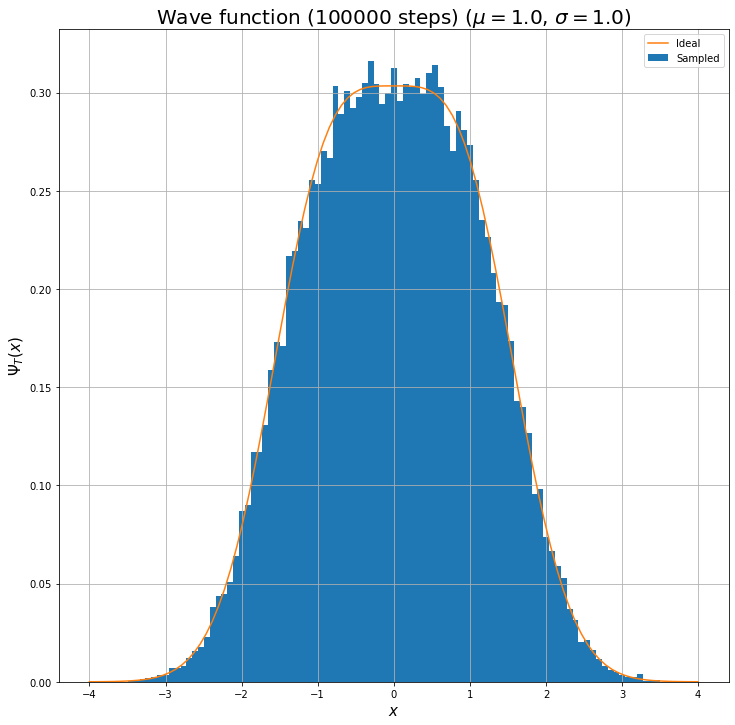

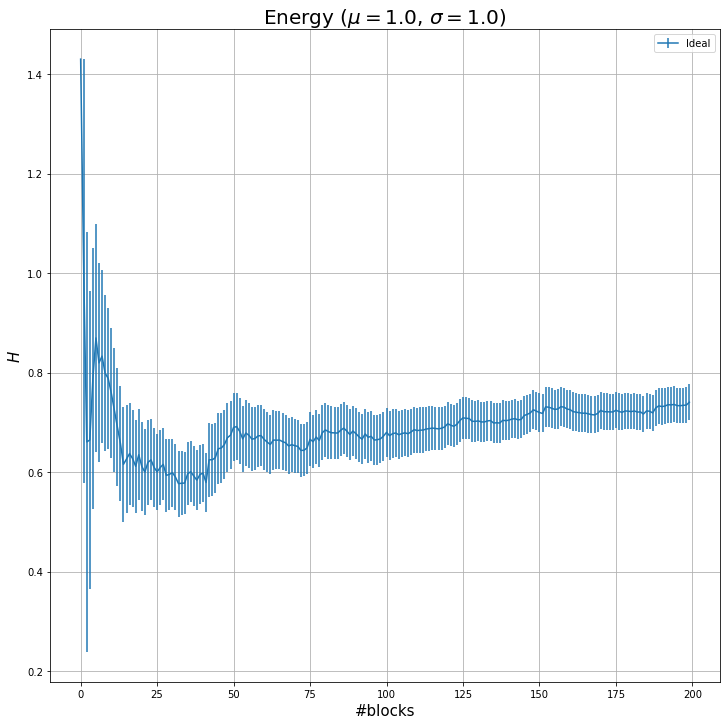

In [3]:
position = 1
set_initial_conditions(stepNumber, samplingType, equilibriumSteps, blockNumber, mu, sigma)
compile_simulation()
run_simulation(position)
plot_simulation(stepNumber, samplingType, mu, sigma)
plot_energy(stepNumber, samplingType, blockNumber, mu, sigma)

# Exercise 08.2

First of all I try to find the minimum for $\langle \hat{H} \rangle_T$.
$$
\langle \hat{H} \rangle_T =
\frac{\langle \Psi_T^{\mu,\sigma} | \hat{H} | \Psi_T^{\mu,\sigma} \rangle}{\langle \Psi_T^{\mu,\sigma} | \Psi_T^{\mu,\sigma} \rangle} =
E(\mu, \sigma)
$$

My first attempt is with simulated annealing:
In each step i will try to change both $\mu$ and $\sigma$. Then with the Metropolis algorithm i will accept the move with a probability $p$.

$$
p(\mu_{new}, \sigma_{new} | \mu_{old}, \sigma_{old}) = \min \left[ 1, \exp \left\{ - \frac{E(\mu_{new}, \sigma_{new}) - E(\mu_{old}, \sigma_{old})}{t} \right\} \right]
$$

with
$$
T(x_{new} | x_{old}) = \begin{cases} \frac{1}{\delta}, & \mbox{if } x_{new} \in \left[ x_{old} - \frac{\delta}{2}, x_{old} + \frac{\delta}{2} \right] 
\\ 0, & \mbox{if } x_{new} \notin \left[ x_{old} - \frac{\delta}{2}, x_{old} + \frac{\delta}{2} \right] \end{cases}
$$

and $t$ is:

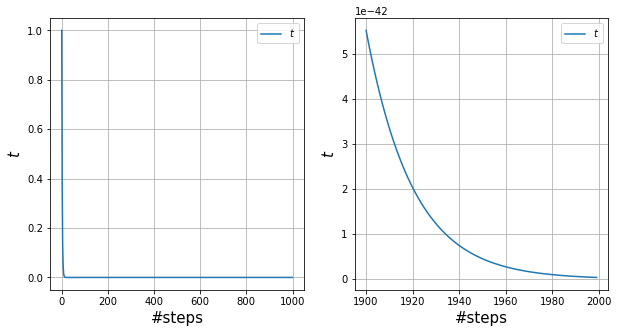

In [4]:
s = np.arange(1000)
t = np.exp(-s/2)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(s, t, label='$t$')
plt.legend(loc='best')
plt.xlabel('#steps', fontsize=axesLabelSize)
plt.ylabel('$t$', fontsize=axesLabelSize)
plt.grid(True)
s = np.arange(1900,2000)
t = np.exp(-s/20)
plt.subplot(122)
plt.plot(s, t, label='$t$')
plt.legend(loc='best')
plt.xlabel('#steps', fontsize=axesLabelSize)
plt.ylabel('$t$', fontsize=axesLabelSize)
plt.grid(True)
plt.show()

In [5]:
def minimize_parameters():
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/#define MEASURE .*.$/#define MEASURE 0/" '+sourceDirectory+'metropolis.h'])
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/#define MINIMIZE .*.$/#define MINIMIZE 1/" '+sourceDirectory+'metropolis.h'])
    
    stepNumber = 20000
    
    set_initial_conditions(stepNumber, samplingType, equilibriumSteps, blockNumber, mu, sigma)
    compile_simulation()
    run_simulation(position)
    
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/#define MEASURE .*.$/#define MEASURE 1/" '+sourceDirectory+'metropolis.h'])
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/#define MINIMIZE .*.$/#define MINIMIZE 0/" '+sourceDirectory+'metropolis.h'])
    
    with open(sourceDirectory+'/minimal_parameters.txt') as reader:
        for line in reader:
            a = float((line.split())[0])
            b = float((line.split())[1])
    
    return a, b

In [6]:
mu, sigma = minimize_parameters()
print("µ", mu)
print("sigma", sigma)

g++ Hydrogen/vmc.o Hydrogen/random.o Hydrogen/metropolis.o Hydrogen/main.o -o Hydrogen/main.exe
cd Hydrogen/; \
	./main.exe
No starting point set. Setting starting point to (0)
Acceptance rate: 0

µ -0.78268
sigma 0.659058


Ground state energy:  -0.46046587969271563
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930202


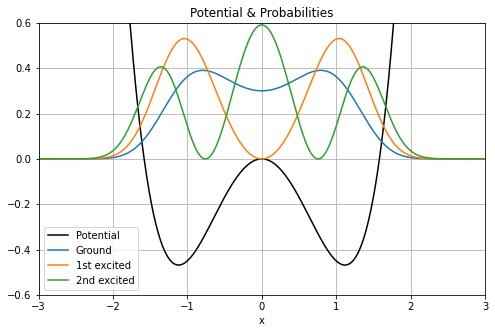

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,Psi = np.linalg.eigh(H)

# Take the transpose & normalize
Psi = np.transpose(Psi)
Psi = Psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(Psi[0])**2, label="Ground")
plt.plot(x,(Psi[1])**2, label="1st excited")
plt.plot(x,(Psi[2])**2, label="2nd excited")
plt.legend(loc='best')
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

In [8]:
 
def plot_simulation(stepNumber, samplingType, mean, var):
    array = np.zeros(stepNumber)
    N = 100 # number of iterations
    X = np.linspace(-4, 4, N)
    ideal = np.zeros(N)
    i = 0
    accepted = np.zeros(stepNumber)
    with open(sourceDirectory+'/final_configuration.txt') as reader:
        for line in reader:
            array[i] = float((line.split())[0])
            i += 1
            
    ideal = psi_2(X, mean, var)
    
    hbar = 1
    m = 1
    a = 10

    # Step sizes
    x = np.linspace(-a/2, a/2, N)
    dx = x[1] - x[0] # the step size
    V = Vpot(x)

    # The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

    CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
    # np.diag(np.array,k) construct a "diagonal" matrix using the np.array
    # The default is k=0. Use k>0 for diagonals above the main diagonal, 
    # and k<0 for diagonals below the main diagonal

    # Hamiltonian matrix
    H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

    # Compute eigenvectors and their eigenvalues
    E,Psi = np.linalg.eigh(H)

    # Take the transpose & normalize
    Psi = np.transpose(Psi)
    Psi = Psi/np.sqrt(dx)

    
    plt.figure(figsize=(12, 12))
    plt.title('Wave function ('+str(stepNumber)+' steps) ($\mu = $'+str(mean)+', $\sigma = $'+str(var)+')', fontsize=titleSize)
    plt.hist(array, bins=100, density=1, label='Sampled')
    plt.plot(X, ideal, label='Ideal')
    plt.plot(x,(Psi[0])**2, label='Numerical solution')
    plt.legend(loc='best')
    plt.xlabel('$x$', fontsize=axesLabelSize)
    plt.ylabel('$\Psi_T(x)$', fontsize=axesLabelSize)
    plt.grid(True)
    plt.show()

g++ Hydrogen/vmc.o Hydrogen/random.o Hydrogen/metropolis.o Hydrogen/main.o -o Hydrogen/main.exe
cd Hydrogen/; \
	./main.exe
No starting point set. Setting starting point to (0)
Acceptance rate: 0.53154



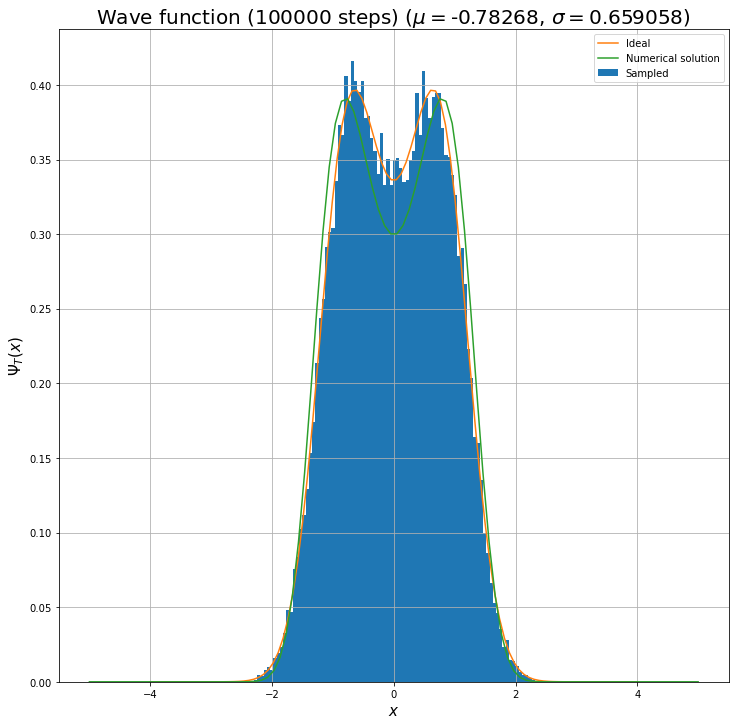

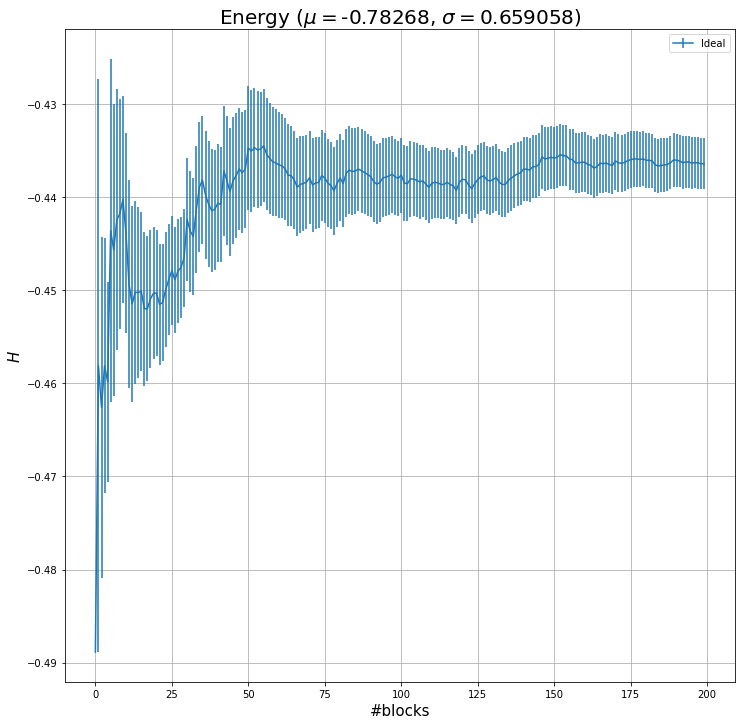

In [9]:
stepNumber = 100000
set_initial_conditions(stepNumber, samplingType, equilibriumSteps, blockNumber, mu, sigma)
compile_simulation()
run_simulation(position)
plot_simulation(stepNumber, samplingType, mu, sigma)
plot_energy(stepNumber, samplingType, blockNumber, mu, sigma)

# Exercise 08.3

Use the PIMC/PIGS code we have provided to study the same 1D quantum system. Use the PIGS algorithm ($T=0$) to project
- a constant trial wave function, $\Psi_T(x)=1$
- using $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ with the variational parameters you have optimized.

Compare your results with those obtained with your VMC code. By using $\Psi_T^{\sigma,\mu}(x)$, how much can you reduce the imaginary time propagation with respect to the first case?

Finally, use the PIMC algorithm ($T>0$) to observe how the histogram with the sampled configurations changes by increasing the temperature.

In [32]:
PIGSDirectory = 'QMC_1D/'
wvfType = ['UNIFORM', 'PSI']
def run_PIGS(wvf):
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/#define WAVEFUNCTION .*.$/#define WAVEFUNCTION '+str(wvf)+'/" '+PIGSDirectory+'qmc1d.cpp'])
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/#define MU .*.$/#define MU '+str(mu)+'/" '+PIGSDirectory+'qmc1d.cpp'])
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/#define SIGMA .*.$/#define SIGMA '+str(sigma)+'/" '+PIGSDirectory+'qmc1d.cpp'])
    print(subprocess.check_output(["/bin/sh", "-c", "cd "+str(PIGSDirectory)+"; make clean"]).decode('utf-8'))
    print(subprocess.check_output(["/bin/sh", "-c", "cd "+str(PIGSDirectory)+"; make"]).decode('utf-8'))
    subprocess.check_output(["/bin/sh", "-c", "cd "+str(PIGSDirectory)+"; ./qmc1d"])
    subprocess.check_output(["/bin/sh", "-c", "cp "+str(PIGSDirectory)+"probability.dat "+str(wvf)+'/probability.dat'])

rm -rf *.o qmc1d potential.dat kinetic.dat probability.dat

g++ -Wall -c qmc1d.cpp `root-config --cflags`
g++ -O3 -Wall -o qmc1d qmc1d.o `root-config --libs`

rm -rf *.o qmc1d potential.dat kinetic.dat probability.dat

g++ -Wall -c qmc1d.cpp `root-config --cflags`
g++ -O3 -Wall -o qmc1d qmc1d.o `root-config --libs`



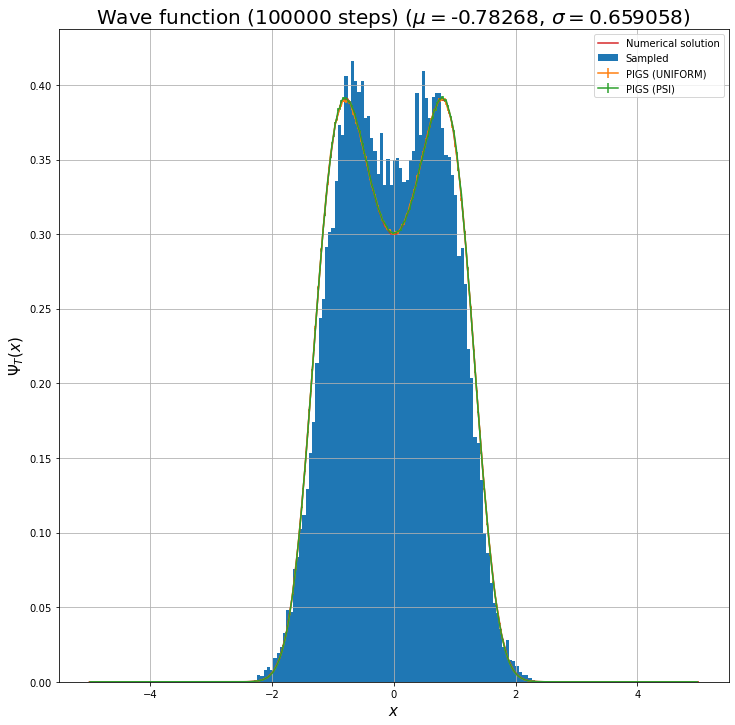

In [36]:
for wvf in wvfType:
    run_PIGS(wvf)
    
stepNumber2 = 400
array = np.zeros(stepNumber)
array2x = np.zeros(stepNumber2)
array2 = np.zeros(stepNumber2)
array2e = np.zeros(stepNumber2)
array3x = np.zeros(stepNumber2)
array3 = np.zeros(stepNumber2)
array3e = np.zeros(stepNumber2)
i = 0
accepted = np.zeros(stepNumber)
with open(sourceDirectory+'/final_configuration.txt') as reader:
    for line in reader:
        array[i] = float((line.split())[0])
        i += 1
        
i = 0
with open(str(wvfType[0])+'/probability.dat') as reader:
    for line in reader:
        array2x[i] = float((line.split())[0])
        array2[i] = float((line.split())[1])
        array2e[i] = float((line.split())[2])
        i += 1
        
i = 0
with open(str(wvfType[1])+'/probability.dat') as reader:
    for line in reader:
        array3x[i] = float((line.split())[0])
        array3[i] = float((line.split())[1])
        array3e[i] = float((line.split())[2])
        i += 1
            
plt.figure(figsize=(12, 12))
plt.title('Wave function ('+str(stepNumber)+' steps) ($\mu = $'+str(mu)+', $\sigma = $'+str(sigma)+')', fontsize=titleSize)
plt.hist(array, bins=100, density=1, label='Sampled')
plt.errorbar(array2x, array2, yerr=array2e, label='PIGS ('+str(wvfType[0])+')')
plt.errorbar(array3x, array3, yerr=array3e, label='PIGS ('+str(wvfType[1])+')')
plt.plot(x,(Psi[0])**2, label="Numerical solution")
plt.legend(loc='best')
plt.xlabel('$x$', fontsize=axesLabelSize)
plt.ylabel('$\Psi_T(x)$', fontsize=axesLabelSize)
plt.grid(True)
plt.show()

The solution found fith PIGS is almost identical to the analitical solution of the Schrödinger equation.

Let's see now what happens if I reduce the imaginary time propagation.

In [42]:
def run_PIGS_time(wvf, it):
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/#define WAVEFUNCTION .*.$/#define WAVEFUNCTION '+str(wvf)+'/" '+PIGSDirectory+'qmc1d.cpp'])
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/#define MU .*.$/#define MU '+str(mu)+'/" '+PIGSDirectory+'qmc1d.cpp'])
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/#define SIGMA .*.$/#define SIGMA '+str(sigma)+'/" '+PIGSDirectory+'qmc1d.cpp'])
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/^.*.$/imaginaryTimePropagation\t\t'+str(it)+'/ if $. == 3" '+PIGSDirectory+'input.dat'])
    subprocess.check_output(["/bin/sh", "-c", "cd "+str(PIGSDirectory)+"; make clean"])
    subprocess.check_output(["/bin/sh", "-c", "cd "+str(PIGSDirectory)+"; make"])
    subprocess.check_output(["/bin/sh", "-c", "cd "+str(PIGSDirectory)+"; ./qmc1d"])
    subprocess.check_output(["/bin/sh", "-c", "cp "+str(PIGSDirectory)+"probability.dat "+str(wvf)+'/probability.'+str(it)+'.dat'])

In [45]:
def run_PIGS_temperature(wvf, it):
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/#define WAVEFUNCTION .*.$/#define WAVEFUNCTION '+str(wvf)+'/" '+PIGSDirectory+'qmc1d.cpp'])
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/#define MU .*.$/#define MU '+str(mu)+'/" '+PIGSDirectory+'qmc1d.cpp'])
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/#define SIGMA .*.$/#define SIGMA '+str(sigma)+'/" '+PIGSDirectory+'qmc1d.cpp'])
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/^.*.$/temperature\t\t\t\t'+str(it)+'/ if $. == 2" '+PIGSDirectory+'input.dat'])
    subprocess.check_output(["/bin/sh", "-c", "cd "+str(PIGSDirectory)+"; make clean"])
    subprocess.check_output(["/bin/sh", "-c", "cd "+str(PIGSDirectory)+"; make"])
    subprocess.check_output(["/bin/sh", "-c", "cd "+str(PIGSDirectory)+"; ./qmc1d"])
    subprocess.check_output(["/bin/sh", "-c", "cp "+str(PIGSDirectory)+"probability.dat "+str(wvf)+'/probability.'+str(it)+'.dat'])

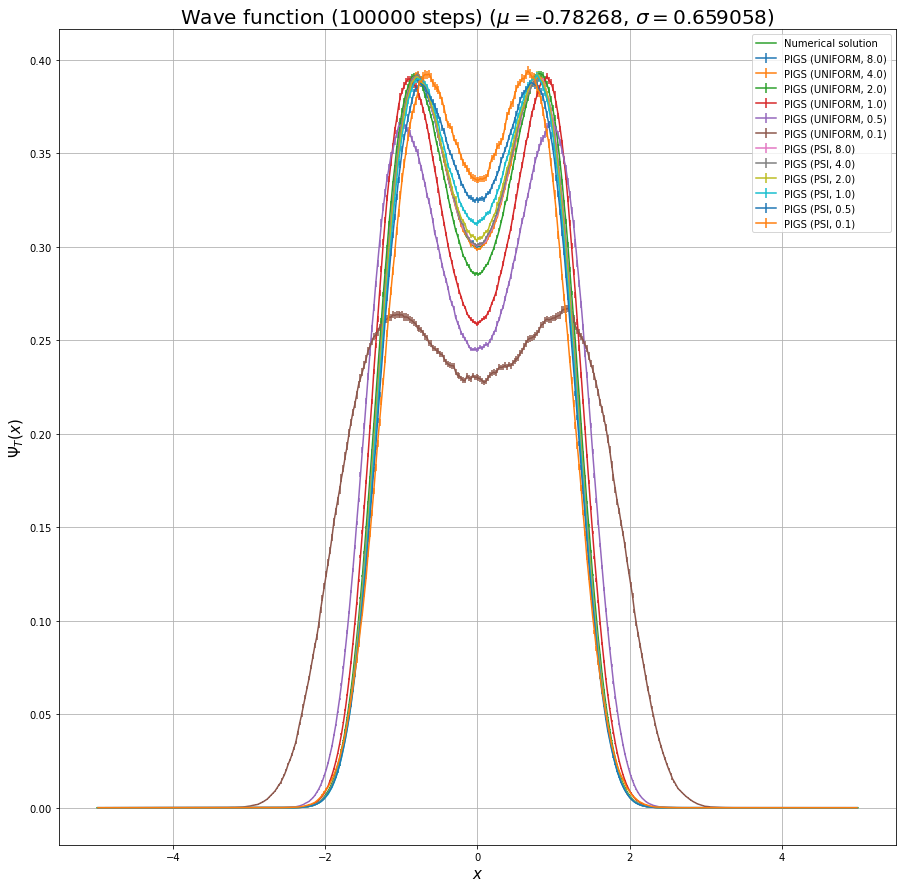

In [44]:
timeArray = [8.0, 4.0, 2.0, 1.0, 0.5, 0.1]

plt.figure(figsize=(15, 15))
plt.title('Wave function ('+str(stepNumber)+' steps) ($\mu = $'+str(mu)+', $\sigma = $'+str(sigma)+')', fontsize=titleSize)

for wvf in wvfType:
    for time in timeArray:
        run_PIGS_time(wvf, time)
        stepNumber2 = 400
        arrayx = np.zeros(stepNumber2)
        array = np.zeros(stepNumber2)
        arraye = np.zeros(stepNumber2)
        i = 0
        with open(str(wvf)+'/probability.'+str(time)+'.dat') as reader:
            for line in reader:
                arrayx[i] = float((line.split())[0])
                array[i] = float((line.split())[1])
                arraye[i] = float((line.split())[2])
                i += 1
        plt.errorbar(arrayx, array, yerr=arraye, label='PIGS ('+str(wvf)+', $it = $'+str(time)+')')
        
subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/^.*.$/imaginaryTimePropagation\t\t8.0/ if $. == 3" '+PIGSDirectory+'input.dat'])
plt.plot(x,(Psi[0])**2, label="Numerical solution")
plt.legend(loc='best')
plt.xlabel('$x$', fontsize=axesLabelSize)
plt.ylabel('$\Psi_T(x)$', fontsize=axesLabelSize)
plt.grid(True)
plt.show()

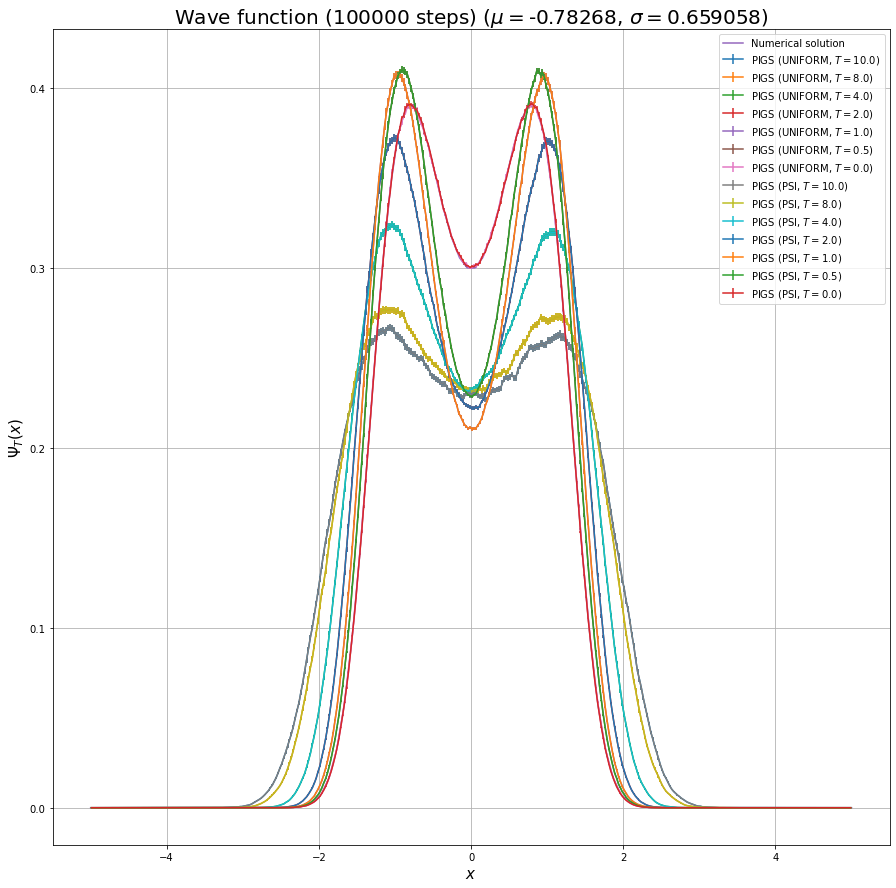

In [47]:
temperatureArray = [10.0, 8.0, 4.0, 2.0, 1.0, 0.5, 0.0]

plt.figure(figsize=(15, 15))
plt.title('Wave function ('+str(stepNumber)+' steps) ($\mu = $'+str(mu)+', $\sigma = $'+str(sigma)+')', fontsize=titleSize)

for wvf in wvfType:
    for time in temperatureArray:
        run_PIGS_temperature(wvf, time)
        stepNumber2 = 400
        arrayx = np.zeros(stepNumber2)
        array = np.zeros(stepNumber2)
        arraye = np.zeros(stepNumber2)
        i = 0
        with open(str(wvf)+'/probability.'+str(time)+'.dat') as reader:
            for line in reader:
                arrayx[i] = float((line.split())[0])
                array[i] = float((line.split())[1])
                arraye[i] = float((line.split())[2])
                i += 1
        plt.errorbar(arrayx, array, yerr=arraye, label='PIGS ('+str(wvf)+', $T = $'+str(time)+')')
        
subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/^.*.$/temperature\t\t\t\t0.0/ if $. == 2" '+PIGSDirectory+'input.dat'])
plt.plot(x,(Psi[0])**2, label="Numerical solution")
plt.legend(loc='best')
plt.xlabel('$x$', fontsize=axesLabelSize)
plt.ylabel('$\Psi_T(x)$', fontsize=axesLabelSize)
plt.grid(True)
plt.show()

If the temperature increases the system has a higher probability to reach low probability zones.  
The resulting probability distribution is thus flattened.